<a href="https://colab.research.google.com/github/SandySingh72/DATA_Analytics/blob/main/TensorFlow_MultiLayer_Modelling_with_HR_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
hr = pd.read_csv("HR_comma_sep.csv")
dum_hr = pd.get_dummies(hr)

In [3]:
train, test = train_test_split( dum_hr, test_size=0.3, random_state=25, stratify=dum_hr['left'] )
X_train = train.drop('left', axis=1)
y_train = train['left']
X_test = test.drop('left', axis=1)
y_test = test['left']


In [4]:
X_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10496, 20), (10496,), (4499, 20), (4499,))

In [6]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
13389,0.48,0.77,5,250,2,0,1,False,True,False,False,False,False,False,False,False,False,False,False,True
7957,0.90,0.62,5,225,2,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
3220,0.48,0.94,3,162,3,1,0,False,False,False,False,False,False,False,True,False,False,False,False,True
14307,0.38,0.52,2,154,3,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
8691,0.85,0.99,5,176,4,0,0,False,False,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,0.10,0.93,6,269,4,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False
6575,0.72,0.63,4,207,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
12608,0.37,0.47,2,138,3,1,0,False,False,True,False,False,False,False,False,False,False,False,False,True
1518,0.10,0.82,7,265,4,0,0,False,True,False,False,False,False,False,False,False,False,False,True,False


In [7]:
scaler = MinMaxScaler().set_output(transform='pandas')
X_trn_scl = scaler.fit_transform(X_train)
X_tst_scl = scaler.transform(X_test)

In [8]:
from re import X
X_trn_scl


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
13389,0.428571,0.640625,0.6,0.719626,0.000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7957,0.890110,0.406250,0.6,0.602804,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3220,0.428571,0.906250,0.2,0.308411,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
14307,0.318681,0.250000,0.0,0.271028,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8691,0.835165,0.984375,0.6,0.373832,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,0.010989,0.890625,0.8,0.808411,0.250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6575,0.692308,0.421875,0.4,0.518692,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12608,0.307692,0.171875,0.0,0.196262,0.125,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1518,0.010989,0.718750,1.0,0.789720,0.250,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# **Model Definition Single Layer Perception**

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(),
                          activation='sigmoid')
])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

None


# **Initial Weights**

In [10]:
model.get_weights()

[array([[-0.15041707],
        [-0.25105673],
        [-0.0166814 ],
        [ 0.0728163 ],
        [ 0.00852615],
        [-0.39407754],
        [-0.49116752],
        [-0.25664976],
        [-0.03926757],
        [ 0.21883382],
        [ 0.43239102],
        [-0.01564116],
        [ 0.33453202],
        [ 0.50644463],
        [-0.27460992],
        [-0.06551686],
        [-0.18730466],
        [ 0.09159895],
        [ 0.22104765],
        [-0.07176467]], dtype=float32),
 array([0.], dtype=float32)]

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy() ,metrics=['acc'])

In [12]:
history = model.fit( X_trn_scl, y_train, validation_data=(X_tst_scl, y_test), epochs=100)

Epoch 1/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.7293 - loss: 0.5807 - val_acc: 0.7639 - val_loss: 0.5260
Epoch 2/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.7696 - loss: 0.5117 - val_acc: 0.7617 - val_loss: 0.5103
Epoch 3/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.7631 - loss: 0.5047 - val_acc: 0.7615 - val_loss: 0.4978
Epoch 4/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7626 - loss: 0.4912 - val_acc: 0.7611 - val_loss: 0.4874
Epoch 5/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7599 - loss: 0.4878 - val_acc: 0.7617 - val_loss: 0.4788
Epoch 6/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7680 - loss: 0.4711 - val_acc: 0.7624 - val_loss: 0.4716
Epoch 7/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7650 - loss: 0.4635 - val_acc: 0.7671 - val_loss: 0.4656
Epoch 8/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7715 - loss: 0.4676 - val_acc: 0.7804 - val_loss: 0.4606
Epoch 9/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

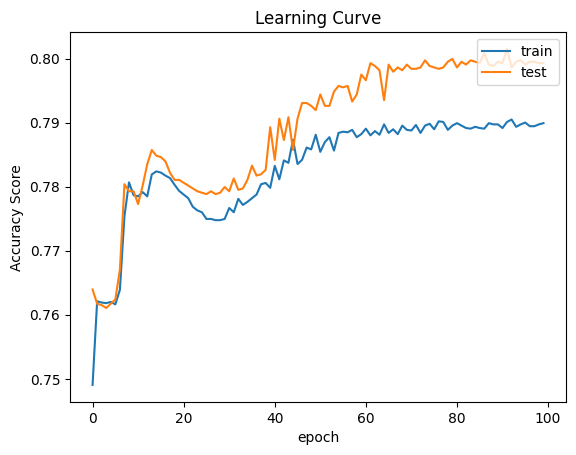

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Learning Curve')
plt.ylabel('Accuracy Score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

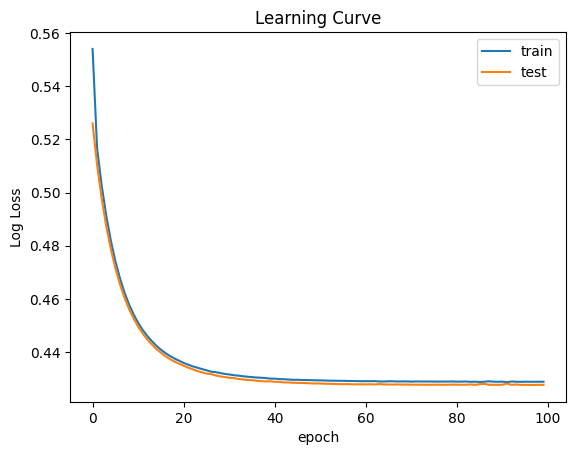

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve')
plt.ylabel('Log Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [15]:
accuracy, logloss = model.evaluate(X_tst_scl, y_test)
print(f"Accuracy: {accuracy}")
print(f"Log Loss: {logloss}")

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7967 - loss: 0.4289
Accuracy: 0.4277343451976776
Log Loss: 0.7992887496948242


# **Model Definition Multi Layer Perception**

**One Layer of 10 Neurons**

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(),
                          activation='relu'),
    tf.keras.layers.Dense(1, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(),
                          activation='sigmoid')
])
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [23]:
model.get_weights()

[array([[-0.15041707, -0.25105673, -0.0166814 ,  0.0728163 ,  0.00852615,
         -0.39407754, -0.49116752, -0.25664976, -0.03926757,  0.21883382],
        [ 0.43239102, -0.01564116,  0.33453202,  0.50644463, -0.27460992,
         -0.06551686, -0.18730466,  0.09159895,  0.22104765, -0.07176467],
        [ 0.39295715,  0.22113165,  0.0829013 , -0.16417569,  0.35110167,
          0.10074851, -0.1814895 ,  0.4449328 ,  0.18375623,  0.14820951],
        [-0.10631689,  0.13884927, -0.29579827,  0.18000717,  0.09291206,
          0.36510828, -0.20532328, -0.14550623, -0.32083583, -0.25056985],
        [ 0.21444638, -0.3033312 , -0.40600386, -0.22680973,  0.26331475,
          0.2911939 , -0.05550315, -0.29988918,  0.0282639 , -0.38730055],
        [-0.03990988, -0.30504656, -0.03557405, -0.08665746,  0.26842257,
         -0.23778462,  0.08020224, -0.13230966, -0.46521214, -0.17012213],
        [-0.3250155 , -0.19324455,  0.25735217, -0.24134782, -0.3421914 ,
         -0.03757136, -0.3709846

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy() ,metrics=['acc'])

In [26]:
history = model.fit( X_trn_scl, y_train, validation_data=(X_tst_scl, y_test), epochs=100)

Epoch 1/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7483 - loss: 0.6106 - val_acc: 0.7622 - val_loss: 0.5402
Epoch 2/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7588 - loss: 0.5314 - val_acc: 0.7622 - val_loss: 0.4957
Epoch 3/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.7645 - loss: 0.4858 - val_acc: 0.7622 - val_loss: 0.4583
Epoch 4/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7587 - loss: 0.4553 - val_acc: 0.7835 - val_loss: 0.4184
Epoch 5/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8044 - loss: 0.4117 - val_acc: 0.8300 - val_loss: 0.3868
Epoch 6/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8269 - loss: 0.3823 - val_acc: 0.8429 - val_loss: 0.3599
Epoch 7/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8492 - loss: 0.3501 - val_acc: 0.8564 - val_loss: 0.3365
Epoch 8/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8561 - loss: 0.3327 - val_acc: 0.8651 - val_loss: 0.3161
Epoch 9/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

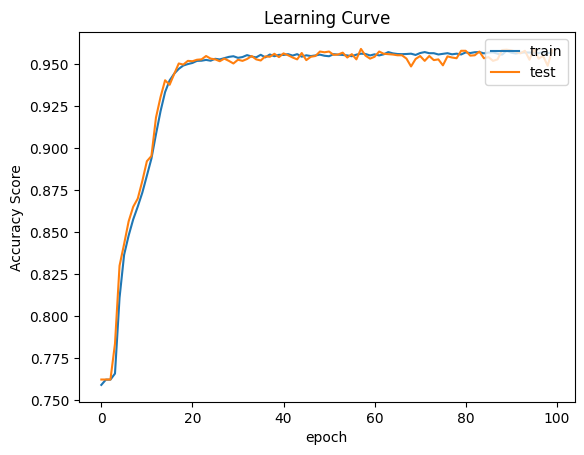

In [27]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Learning Curve')
plt.ylabel('Accuracy Score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

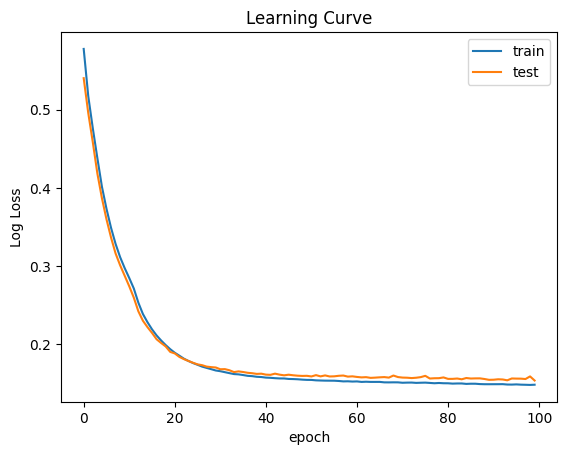

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve')
plt.ylabel('Log Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**One Layer of 20 Neurons**

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(20, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(),
                          activation='relu'),
    tf.keras.layers.Dense(1, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(),
                          activation='sigmoid')
])
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 441 (1.72 KB)

 Trainable params: 441 (1.72 KB)

 Non-trainable params: 0 (0.00 B)

None


In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy() ,metrics=['acc'])

In [33]:
history = model.fit( X_trn_scl, y_train, validation_data=(X_tst_scl, y_test), epochs=100)

Epoch 1/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.6077 - loss: 0.6549 - val_acc: 0.7622 - val_loss: 0.5228
Epoch 2/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7559 - loss: 0.5150 - val_acc: 0.7622 - val_loss: 0.4670
Epoch 3/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7718 - loss: 0.4504 - val_acc: 0.8173 - val_loss: 0.4149
Epoch 4/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8248 - loss: 0.3951 - val_acc: 0.8493 - val_loss: 0.3699
Epoch 5/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8524 - loss: 0.3590 - val_acc: 0.8686 - val_loss: 0.3360
Epoch 6/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8725 - loss: 0.3276 - val_acc: 0.8835 - val_loss: 0.3010
Epoch 7/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8857 - loss: 0.2903 - val_acc: 0.8980 - val_loss: 0.2729
Epoch 8/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8989 - loss: 0.2629 - val_acc: 0.9062 - val_loss: 0.2493
Epoch 9/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

**Three Layers of 15, 10 and 5 Neurons**

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(15, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(),
                          activation='relu'),
    tf.keras.layers.Dense(10, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(),
                          activation='relu'),
    tf.keras.layers.Dense(5, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(),
                          activation='relu'),
    tf.keras.layers.Dense(1, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(),
                          activation='sigmoid')
])
print(model.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536 (2.09 KB)

 Trainable params: 536 (2.09 KB)

 Non-trainable params: 0 (0.00 B)

None


In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy() ,metrics=['acc'])

In [36]:
history = model.fit( X_trn_scl, y_train, validation_data=(X_tst_scl, y_test), epochs=100)

Epoch 1/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.7202 - loss: 0.6002 - val_acc: 0.7622 - val_loss: 0.4883
Epoch 2/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7765 - loss: 0.4686 - val_acc: 0.8168 - val_loss: 0.4035
Epoch 3/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8382 - loss: 0.3735 - val_acc: 0.8978 - val_loss: 0.2746
Epoch 4/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9108 - loss: 0.2445 - val_acc: 0.9349 - val_loss: 0.1958
Epoch 5/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9398 - loss: 0.1816 - val_acc: 0.9473 - val_loss: 0.1771
Epoch 6/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9533 - loss: 0.1601 - val_acc: 0.9467 - val_loss: 0.1706
Epoch 7/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9452 - loss: 0.1695 - val_acc: 0.9495 - val_loss: 0.1681
Epoch 8/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9506 - loss: 0.1644 - val_acc: 0.9491 - val_loss: 0.1620
Epoch 9/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [39]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001, restore_best_weights=True)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy() ,metrics=['acc'])

In [40]:
history = model.fit( X_trn_scl, y_train, validation_data=(X_tst_scl, y_test), epochs=100, callbacks=[early])

Epoch 1/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9638 - loss: 0.1080 - val_acc: 0.9584 - val_loss: 0.1273
Epoch 2/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9659 - loss: 0.1093 - val_acc: 0.9580 - val_loss: 0.1261
Epoch 3/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9661 - loss: 0.1058 - val_acc: 0.9587 - val_loss: 0.1261
Epoch 4/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9615 - loss: 0.1126 - val_acc: 0.9600 - val_loss: 0.1246
Epoch 5/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9634 - loss: 0.1143 - val_acc: 0.9558 - val_loss: 0.1307
Epoch 6/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9622 - loss: 0.1162 - val_acc: 0.9598 - val_loss: 0.1229
Epoch 7/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9671 - loss: 0.1013 - val_acc: 0.9564 - val_loss: 0.1301
Epoch 8/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9606 - loss: 0.1151 - val_acc: 0.9604 - val_loss: 0.1234
Epoch 9/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/

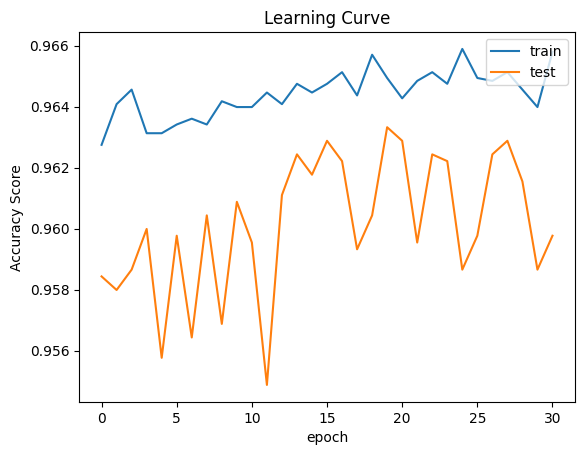

In [41]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Learning Curve')
plt.ylabel('Accuracy Score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

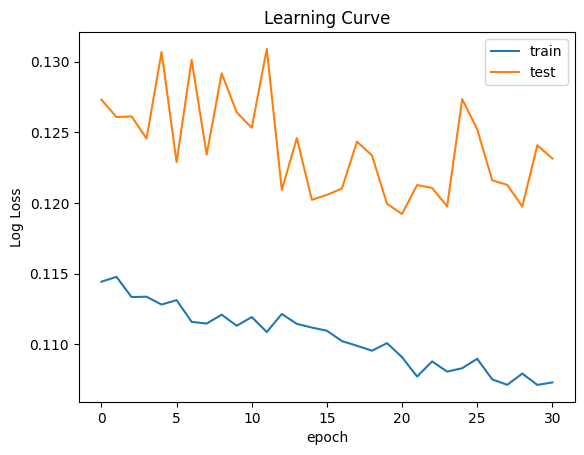

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve')
plt.ylabel('Log Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()